In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import plotly.express as px

In [2]:
df = pd.read_csv('../input/train.csv')
df.columns = [col.lower() for col in df]
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
cabins = df.pop('cabin')
cabins = cabins.str.split('/', expand=True)
cabins.columns = ['deck','room','side']
cabins.head()

,deck,room,side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [4]:
df = pd.concat([df,cabins], axis=1)

In [5]:
spending_cols = ['roomservice','foodcourt','shoppingmall','spa','vrdeck']
df = df.drop(columns=['destination','age','name'] + spending_cols)

In [6]:
df.head()

,passengerid,homeplanet,cryosleep,vip,transported,deck,room,side
0,0001_01,Europa,False,False,False,B,0,P
1,0002_01,Earth,False,False,True,F,0,S
2,0003_01,Europa,False,True,False,A,0,S
3,0003_02,Europa,False,False,False,A,0,S
4,0004_01,Earth,False,False,True,F,1,S


In [7]:
df = df.dropna()

In [8]:
deck_order = ['T','A','B','C','D','E','F','G']
side_order = ['S','P']

In [9]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder( categories=[deck_order, side_order])

encoder.fit(df[['deck','side']])
encoder.transform(df[['deck','side']])

array([[2., 1.],
       [6., 0.],
       [1., 0.],
       ...,
       [7., 0.],
       [5., 0.],
       [5., 0.]])

In [10]:
df[['deck','side']] = encoder.transform(df[['deck','side']])

In [13]:
df.room = df.room.astype(int)

In [14]:
def fix_dtypes(df):
    """convert_dtypes() chooses some slightly wonky data types that cause problems later.
    Fix the wonk by creating a new dataframe from the dataframe. """
    df = df.convert_dtypes()
    fix = pd.DataFrame(df.to_dict()) 
    return fix

df = fix_dtypes(df)

In [15]:
df.dtypes

passengerid    object
homeplanet     object
cryosleep        bool
vip              bool
transported      bool
deck            int64
room            int64
side            int64
dtype: object

In [16]:
df['side_offset'] = df.side - (df.room % 2)*.2

In [17]:
fig = px.scatter_3d(data_frame=df, x='room', y='side_offset', z='deck', color='transported')
fig.update_layout(width=700, height=500)
fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})

In [ ]:
df[df['deck']==0]

,passengerid,homeplanet,cryosleep,vip,transported,deck,room,side
2254,2414_01,Europa,False,False,False,0,1,1
2734,2935_01,Europa,False,False,False,0,2,1
2763,2971_01,Europa,False,False,True,0,3,1


In [21]:
y = df.transported

tdf = pd.concat([cabins, y], axis=1)
tdf.head()

,deck,room,side,transported
0,B,0,P,False
1,F,0,S,True
2,A,0,S,False
3,A,0,S,False
4,F,1,S,True


In [25]:
tdf = tdf.dropna()
tdf = fix_dtypes(tdf)
tdf.room = tdf.room.astype(int)
tdf.dtypes

deck           object
room            int32
side           object
transported      bool
dtype: object

In [35]:
tdf.deck.sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)

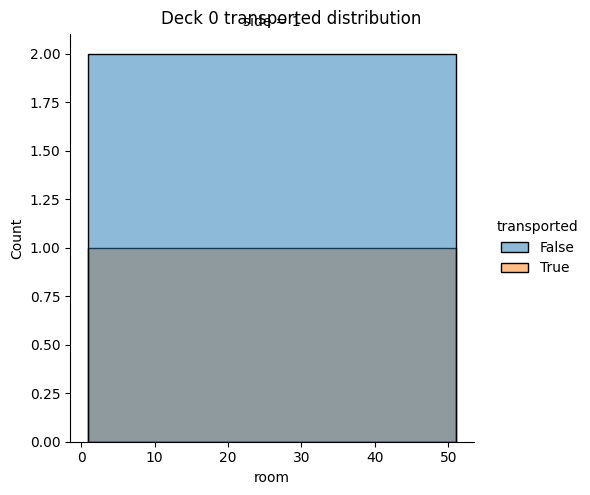

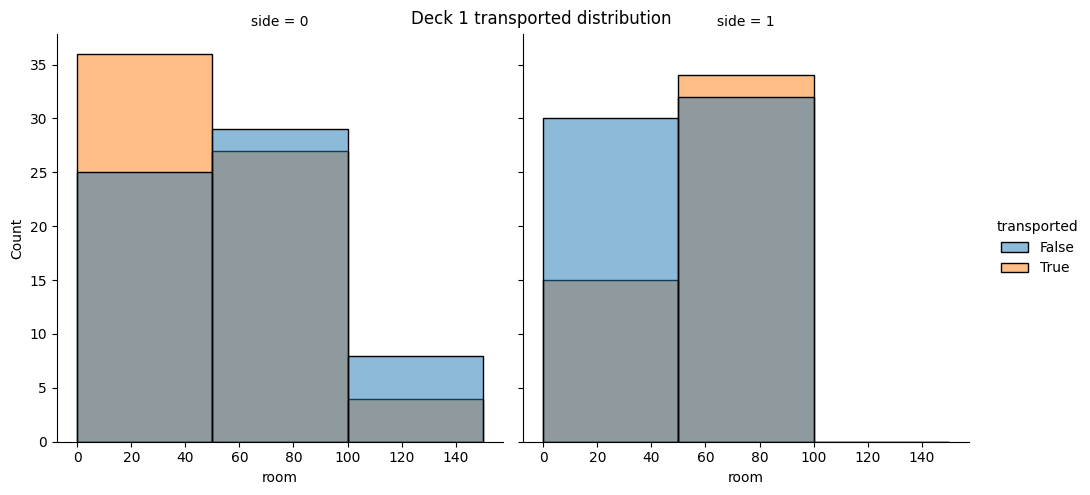

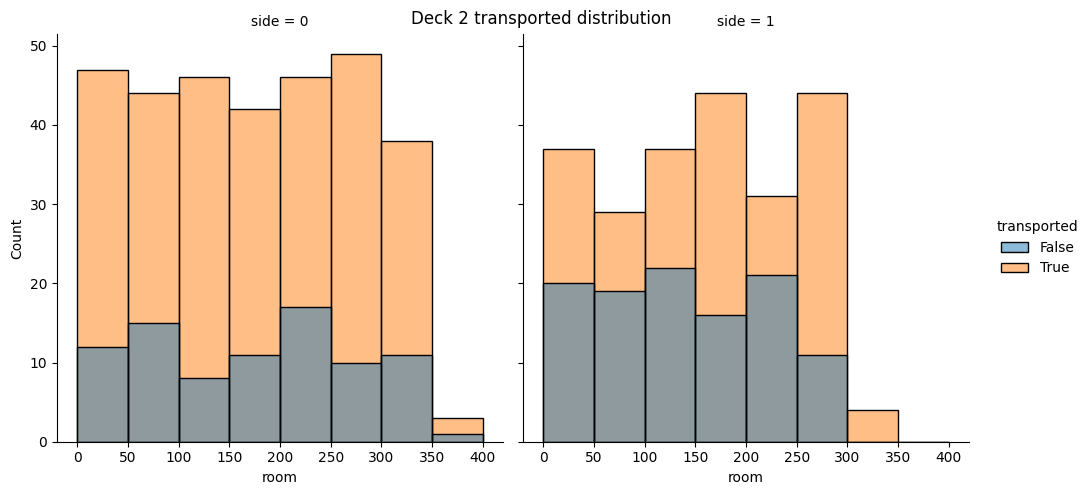

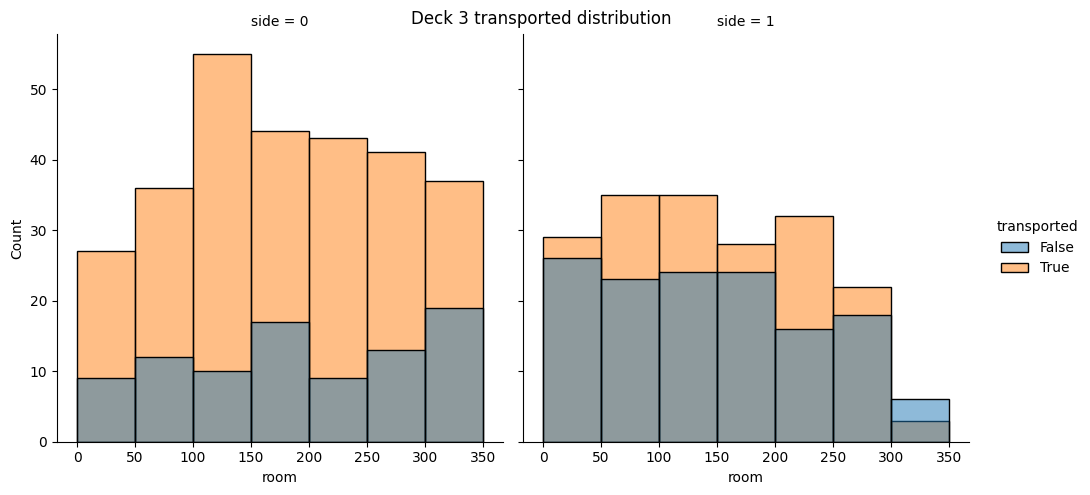

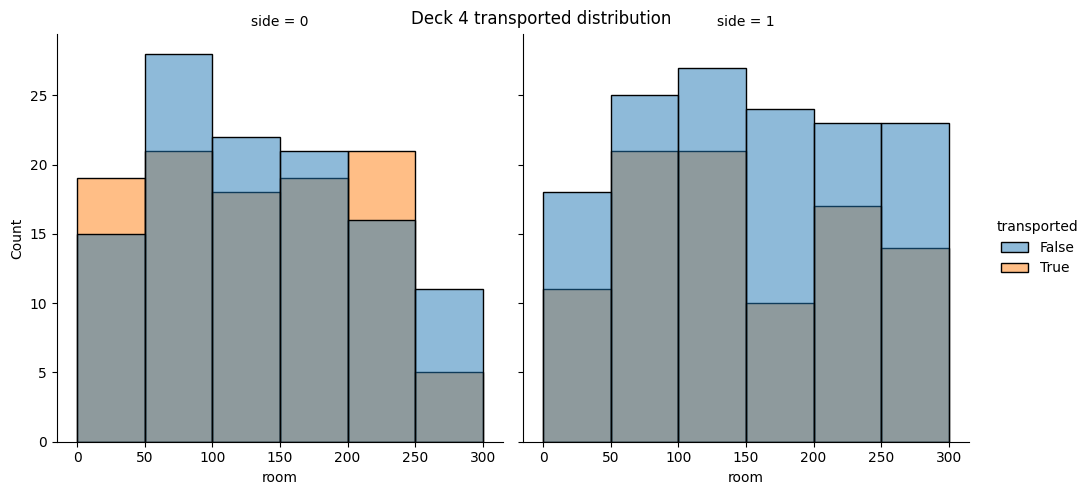

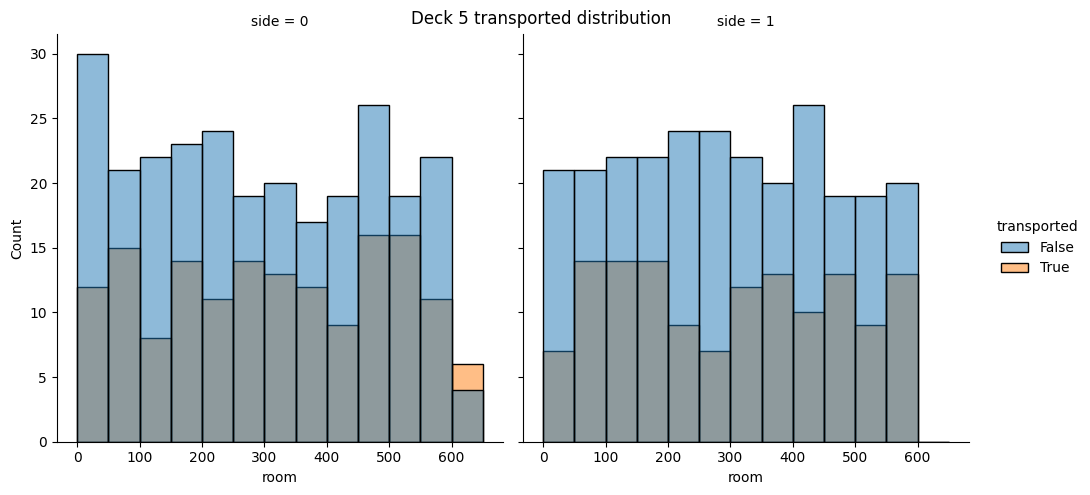

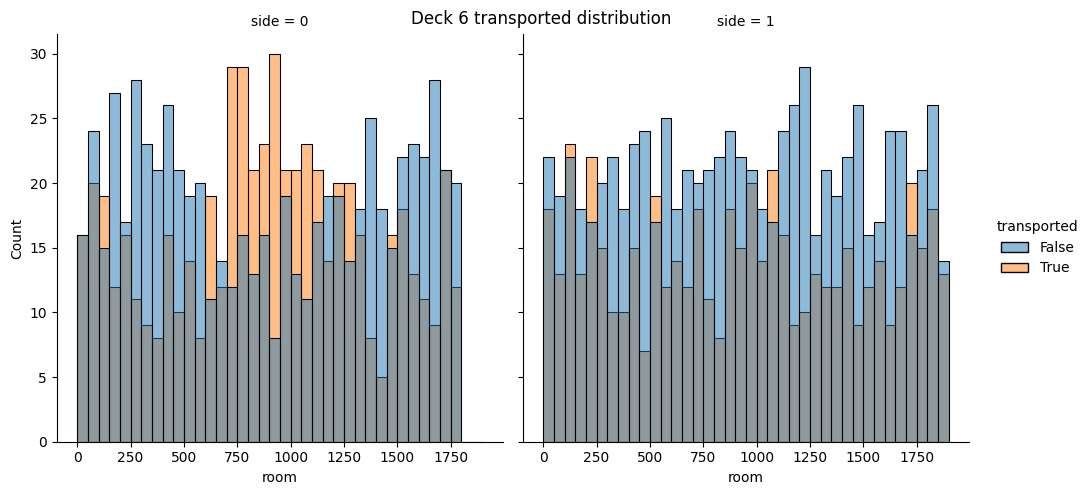

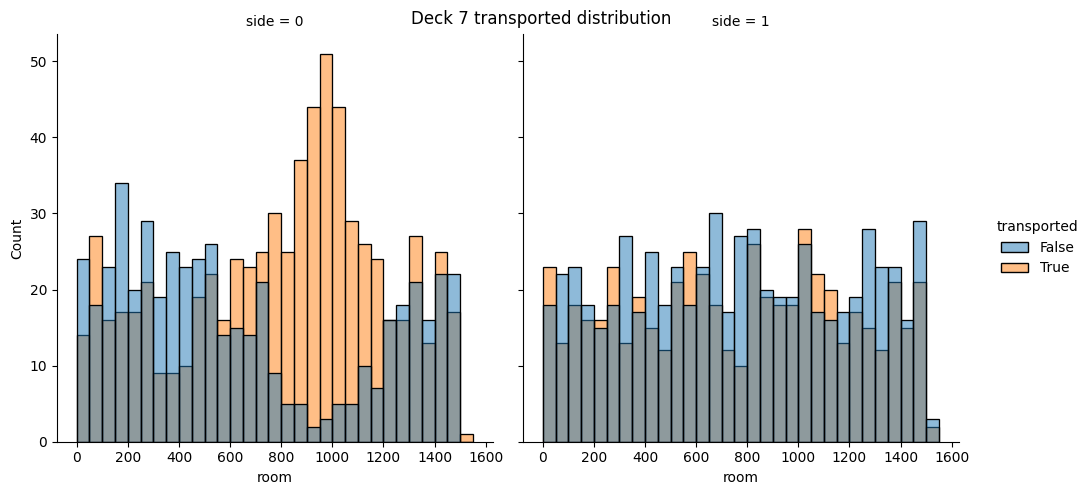

In [47]:
for deck in df.deck.sort_values().unique():
    fig = sns.displot(df[df['deck']==deck].sort_values(by=['deck','side']), x='room', hue='transported', col='side', binwidth=50)
    fig.fig.suptitle(f'Deck {deck} transported distribution')
    plt.show()

## Conclusions

I'm thinking the anomaly struck the ship somewhere on the starboard side between rooms 700 and 1200.  There might have been some passengers that were not in their room at the time of the anomaly, which would explain why not all of the passengers in that area were transported.  We know that some of the passengers racked up some high tabs at the food court and spa, for example.

I wonder if people who spent a lot of time at one of the ship's amenities were more likely to be transported?